In [45]:
import pandas as pd
pd.set_option('max_colwidth', 400)

import numpy as np
import re

import nltk
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer

# nltk.download('stopwords')
# nltk.download('punkt')
nltk.download('wordnet')

from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\George\AppData\Roaming\nltk_data...


In [2]:
df = pd.read_csv('../../data_output/busTweets.csv')

In [3]:
df.head()

,Unnamed: 0,Datetime,Text,Quotes,Likes,Retweets
0,0,2023-03-01 21:00:23+00:00,"Congrats to our newest Transit Operations graduates! There’s no better time to apply than now: New $1,000 hiring bonus + increased hourly rates for select positions, incl. Bus Operators and Bus Mechanics! \nRegister for our next career fair on Fri (3/10): https://t.co/sTk72l7ukt https://t.co/Oho7gblpvX",0,12,1
1,1,2023-03-01 14:01:43+00:00,"We're hosting an in-person career fair on Friday, March 10! Join us to hear about our career opportunities for Bus Operator and Bus Mechanic positions.\n\nRegister today: https://t.co/pa7LfsVGLt https://t.co/y03SGDxESH",0,4,1
2,2,2023-02-28 15:55:11+00:00,"We've increased our starting hourly rate for Full-Time Bus Operators to $28.99 with a top pay of $38.66 at 33 months! Newly hired Full-Time Bus Operators are eligible to receive a $1,000 signing bonus &amp; up to another $3,000 in additional incentives!\nApply: https://t.co/yfhkLhZvxn https://t.co/sC8BfPA8du",2,9,2
3,3,2023-02-27 23:00:15+00:00,"We're hosting an in-person career fair on Friday, March 10! Join us to hear about our career opportunities for Bus Operator and Bus Mechanic positions.\n\nRegister today: https://t.co/pa7LfsVGLt https://t.co/2z6DJDDl2e",0,3,2
4,4,2023-02-25 04:00:04+00:00,"[Planned Work w/Part Closure] Blue Line: Now thru 4am Mon, Bus Substitution Between Addison and Western (O'Hare branch) https://t.co/LMFhFc3dY7",0,1,2


In [4]:
df.describe()

,Unnamed: 0,Quotes,Likes,Retweets
count,4601.000000,4601.000000,4601.000000,4601.000000
mean,2300.000000,0.559444,8.467942,3.794827
std,1328.338624,8.127543,208.765055,66.488989
min,0.000000,0.000000,0.000000,0.000000
25%,1150.000000,0.000000,0.000000,0.000000
50%,2300.000000,0.000000,1.000000,1.000000
75%,3450.000000,0.000000,3.000000,3.000000
max,4600.000000,527.000000,13608.000000,4359.000000


In [5]:
df[df['Likes']>100]

,Unnamed: 0,Datetime,Text,Quotes,Likes,Retweets
10,10,2023-02-17 00:01:26+00:00,⏪1974\nMary Wallace began her career as CTA’s first female bus operator. She retired 33 years later. #BlackHistoryMonth #CTA75 https://t.co/o75b7R0QSx,2,187,23
14,14,2023-02-10 19:00:20+00:00,"Our service reliability is improving. January saw the highest percentage of scheduled service delivered in over a year for bus and rail. We have a long way to go, but we're moving in the right direction. \nSee more at https://t.co/Bug1vUkUeh https://t.co/qwlv1shtDK",28,117,8
28,28,2023-01-31 17:30:24+00:00,"We're excited to announce a new starting hourly rate of $28.99/hour for our Full-Time Bus Operators! In addition, newly hired Full-Time Bus Operators are eligible to receive a $1,000 signing bonus and up to $3,000 in additional incentives. \n\nApply today: https://t.co/DfL5PgIHTs https://t.co/w6Osqa0TJI",10,165,49
52,52,2022-12-21 23:09:10+00:00,"Due to the severe winter weather conditions and frigid temperatures that are expected, the CTA has made the difficult decision to cancel the last two runs of the Holiday Bus – both Thursday and Friday. (1/2)",17,173,37
64,64,2022-12-16 00:30:21+00:00,2005 Holiday Bus vs. 2022 Holiday Bus\n\n#FromTheArchives https://t.co/avhxpbCV3j,7,299,24
145,145,2022-10-01 17:50:42+00:00,POV: You’re boarding our vintage bus to celebrate 75 years of CTA service with us. https://t.co/O61u2cz18L,6,157,21
186,186,2022-08-24 14:29:58+00:00,"Today we launched a fully redesigned CTA Bus Tracker website. Modern design, new features &amp; mobile responsive webpage. Upgrade is part of our “Meeting the Moment” action plan, and lays foundation for future updates to improve accuracy of bus arrival info. https://t.co/CceojnjHzo https://t.co/RH6E3KUS1J",14,256,25
194,194,2022-08-16 21:52:16+00:00,Join us in welcoming the latest full-time bus operators to join the CTA! These operators have either recently started or will enter service this week -- helping you get where need to go! https://t.co/Ipqn6xXfNm,2,105,11
482,482,2022-02-03 21:30:04+00:00,Mary Wallace on her first day as CTA's first female bus driver.\n\n⏪ 1974\n#FromTheArchives #BHM https://t.co/rwjLmwurbg,53,2244,330
635,635,2021-11-21 21:25:11+00:00,"Don't forget: New, lower fares went into effect today, incl lower pass prices and transfers between CTA buses &amp; trains are now free! Contactless Pay-as-you-go fares are also now the same as Ventra fares on bus+rail. Full info: https://t.co/VoCJ0AotJr Annc: https://t.co/4u5ymfsEYI",22,200,54


<AxesSubplot:xlabel='Unnamed: 0', ylabel='Likes'>

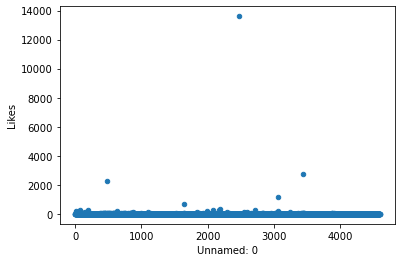

In [6]:
df.plot.scatter(x='Unnamed: 0', y='Likes')

In [28]:
stop = stopwords.words('english')
stop += ['bus', 'https//', '&amp;']

In [8]:
df['tweet_no_stopwords'] = df['Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop]))

df.head()

,Unnamed: 0,Datetime,Text,Quotes,Likes,Retweets,tweet_no_stopwords
0,0,2023-03-01 21:00:23+00:00,"Congrats to our newest Transit Operations graduates! There’s no better time to apply than now: New $1,000 hiring bonus + increased hourly rates for select positions, incl. Bus Operators and Bus Mechanics! \nRegister for our next career fair on Fri (3/10): https://t.co/sTk72l7ukt https://t.co/Oho7gblpvX",0,12,1,"Congrats newest Transit Operations graduates! There’s better time apply now: New $1,000 hiring bonus + increased hourly rates select positions, incl. Bus Operators Bus Mechanics! Register next career fair Fri (3/10): https://t.co/sTk72l7ukt https://t.co/Oho7gblpvX"
1,1,2023-03-01 14:01:43+00:00,"We're hosting an in-person career fair on Friday, March 10! Join us to hear about our career opportunities for Bus Operator and Bus Mechanic positions.\n\nRegister today: https://t.co/pa7LfsVGLt https://t.co/y03SGDxESH",0,4,1,"We're hosting in-person career fair Friday, March 10! Join us hear career opportunities Bus Operator Bus Mechanic positions. Register today: https://t.co/pa7LfsVGLt https://t.co/y03SGDxESH"
2,2,2023-02-28 15:55:11+00:00,"We've increased our starting hourly rate for Full-Time Bus Operators to $28.99 with a top pay of $38.66 at 33 months! Newly hired Full-Time Bus Operators are eligible to receive a $1,000 signing bonus &amp; up to another $3,000 in additional incentives!\nApply: https://t.co/yfhkLhZvxn https://t.co/sC8BfPA8du",2,9,2,"We've increased starting hourly rate Full-Time Bus Operators $28.99 top pay $38.66 33 months! Newly hired Full-Time Bus Operators eligible receive $1,000 signing bonus another $3,000 additional incentives! Apply: https://t.co/yfhkLhZvxn https://t.co/sC8BfPA8du"
3,3,2023-02-27 23:00:15+00:00,"We're hosting an in-person career fair on Friday, March 10! Join us to hear about our career opportunities for Bus Operator and Bus Mechanic positions.\n\nRegister today: https://t.co/pa7LfsVGLt https://t.co/2z6DJDDl2e",0,3,2,"We're hosting in-person career fair Friday, March 10! Join us hear career opportunities Bus Operator Bus Mechanic positions. Register today: https://t.co/pa7LfsVGLt https://t.co/2z6DJDDl2e"
4,4,2023-02-25 04:00:04+00:00,"[Planned Work w/Part Closure] Blue Line: Now thru 4am Mon, Bus Substitution Between Addison and Western (O'Hare branch) https://t.co/LMFhFc3dY7",0,1,2,"[Planned Work w/Part Closure] Blue Line: Now thru 4am Mon, Bus Substitution Between Addison Western (O'Hare branch) https://t.co/LMFhFc3dY7"


In [31]:
df['tweet_no_stopwords'] = df['tweet_no_stopwords'].apply(lambda x: re.sub(r'http\S+', '', x))
df['tweet_no_stopwords'] = df['tweet_no_stopwords'].str.lower()

In [46]:
lemmatizer = WordNetLemmatizer()
df['tweet_no_stopwords'] = df['tweet_no_stopwords'].apply(lambda x: lemmatizer.lemmatize(x))


In [47]:
df.head()

,Unnamed: 0,Datetime,Text,Quotes,Likes,Retweets,tweet_no_stopwords
0,0,2023-03-01 21:00:23+00:00,"Congrats to our newest Transit Operations graduates! There’s no better time to apply than now: New $1,000 hiring bonus + increased hourly rates for select positions, incl. Bus Operators and Bus Mechanics! \nRegister for our next career fair on Fri (3/10): https://t.co/sTk72l7ukt https://t.co/Oho7gblpvX",0,12,1,"congrats newest transit operations graduates! there’s better time apply now: new $1,000 hiring bonus increased hourly rates select positions, incl. bus operators bus mechanics! register next career fair fri (3/10):"
1,1,2023-03-01 14:01:43+00:00,"We're hosting an in-person career fair on Friday, March 10! Join us to hear about our career opportunities for Bus Operator and Bus Mechanic positions.\n\nRegister today: https://t.co/pa7LfsVGLt https://t.co/y03SGDxESH",0,4,1,"we're hosting in-person career fair friday, march 10! join us hear career opportunities bus operator bus mechanic positions. register today:"
2,2,2023-02-28 15:55:11+00:00,"We've increased our starting hourly rate for Full-Time Bus Operators to $28.99 with a top pay of $38.66 at 33 months! Newly hired Full-Time Bus Operators are eligible to receive a $1,000 signing bonus &amp; up to another $3,000 in additional incentives!\nApply: https://t.co/yfhkLhZvxn https://t.co/sC8BfPA8du",2,9,2,"we've increased starting hourly rate full-time bus operators $28.99 top pay $38.66 33 months! newly hired full-time bus operators eligible receive $1,000 signing bonus another $3,000 additional incentives! apply:"
3,3,2023-02-27 23:00:15+00:00,"We're hosting an in-person career fair on Friday, March 10! Join us to hear about our career opportunities for Bus Operator and Bus Mechanic positions.\n\nRegister today: https://t.co/pa7LfsVGLt https://t.co/2z6DJDDl2e",0,3,2,"we're hosting in-person career fair friday, march 10! join us hear career opportunities bus operator bus mechanic positions. register today:"
4,4,2023-02-25 04:00:04+00:00,"[Planned Work w/Part Closure] Blue Line: Now thru 4am Mon, Bus Substitution Between Addison and Western (O'Hare branch) https://t.co/LMFhFc3dY7",0,1,2,"[planned work w/part closure] blue line: now thru 4am mon, bus substitution between addison western (o'hare branch)"


In [48]:
full_text = " ".join(i for i in df.tweet_no_stopwords)
tokenizer = RegexpTokenizer(r'\w+')
tokens = tokenizer.tokenize(full_text)

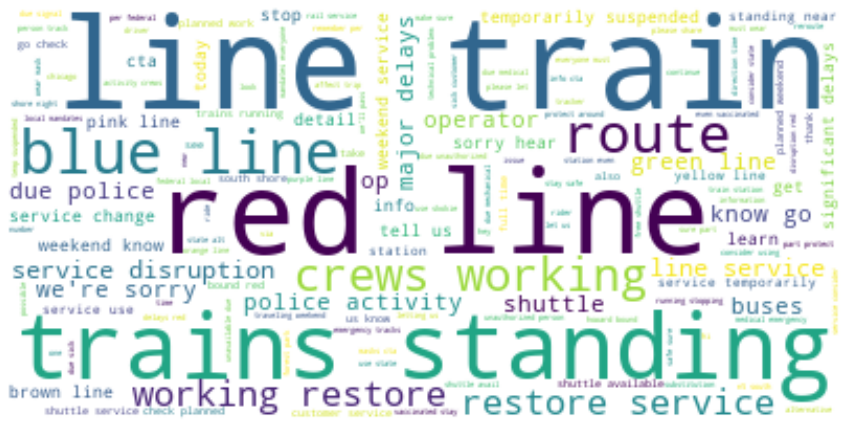

In [49]:
wordcloud = WordCloud(stopwords=stop, background_color="white").generate(full_text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [50]:
# Covid lockdown based on this: https://www.cdc.gov/museum/timeline/covid19.html

df_precovid = df[df['Datetime'] < '2020-03-15']
df_postcovid = df[df['Datetime'] > '2020-03-15']

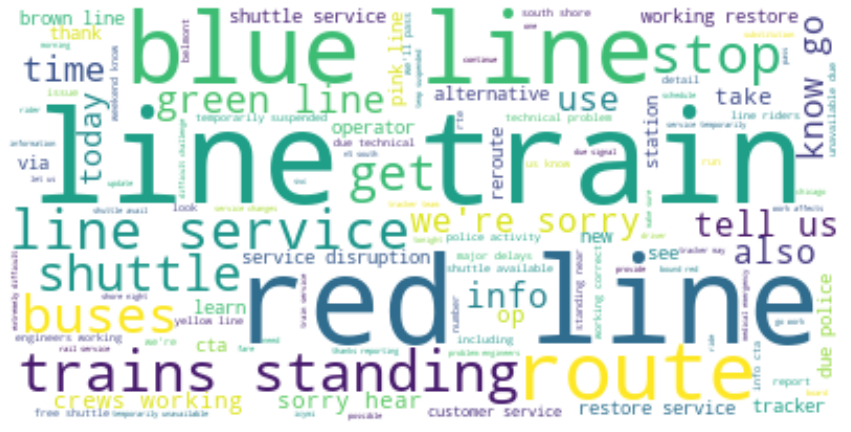

In [51]:
precovid_text = " ".join(i for i in df_precovid.tweet_no_stopwords)
wordcloud = WordCloud(stopwords=stop, background_color="white").generate(precovid_text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

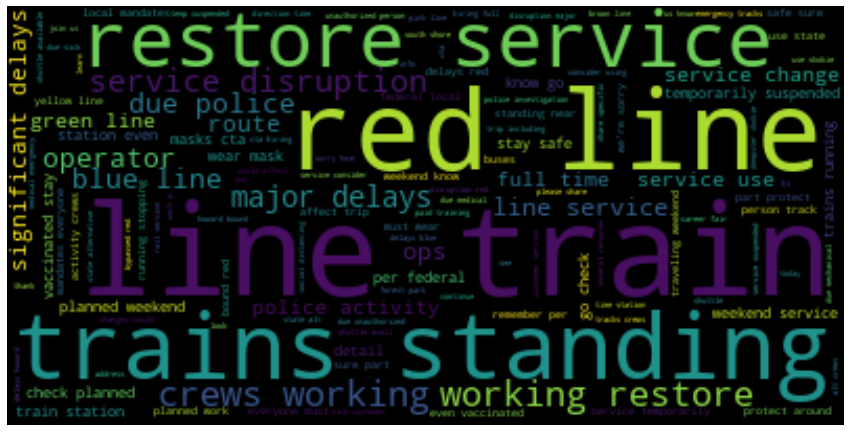

In [52]:
postcovid_text = " ".join(i for i in df_postcovid.tweet_no_stopwords)
wordcloud = WordCloud(stopwords=stop, background_color="black").generate(postcovid_text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

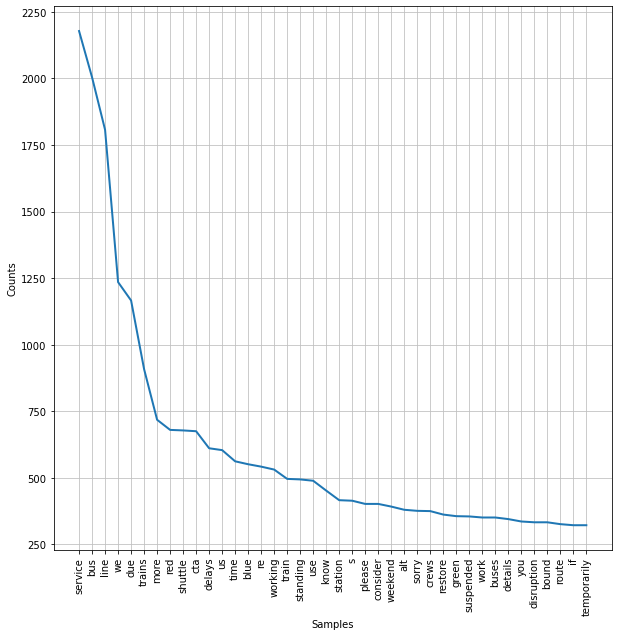

In [53]:
fdist = FreqDist(tokens)
plt.figure(figsize=(10,10))
fdist.plot(40);